<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework4_Problem2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVR (linear kernel) - MSE = 1143714256816.34
SVR (poly kernel) - MSE = 1848172350257.14
SVR (rbf kernel) - MSE = 1129294358651.37
SVR (sigmoid kernel) - MSE = 15494884554953.69
Linear Regression (Ridge) - MSE = 1155425988767.35


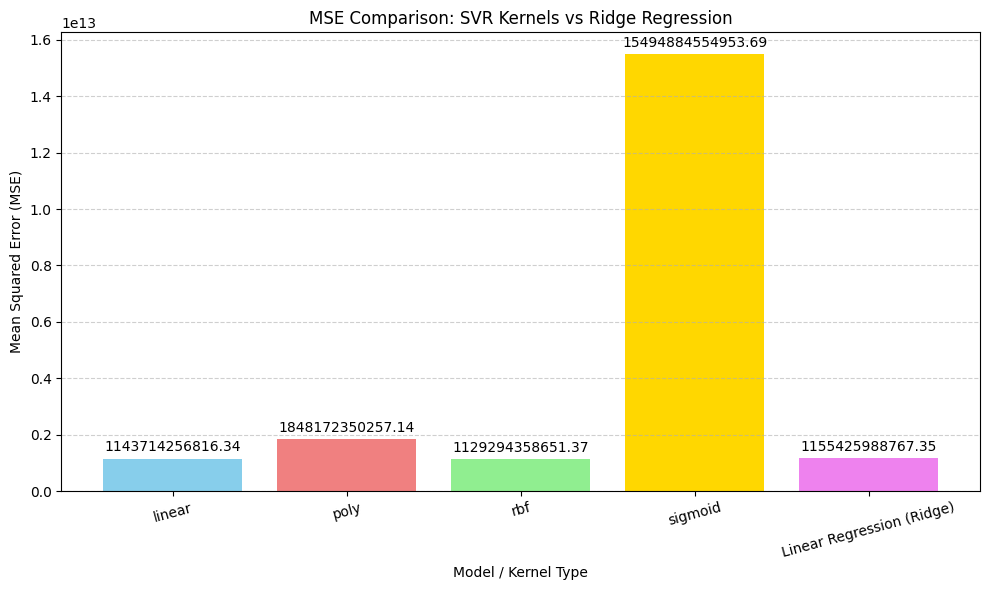

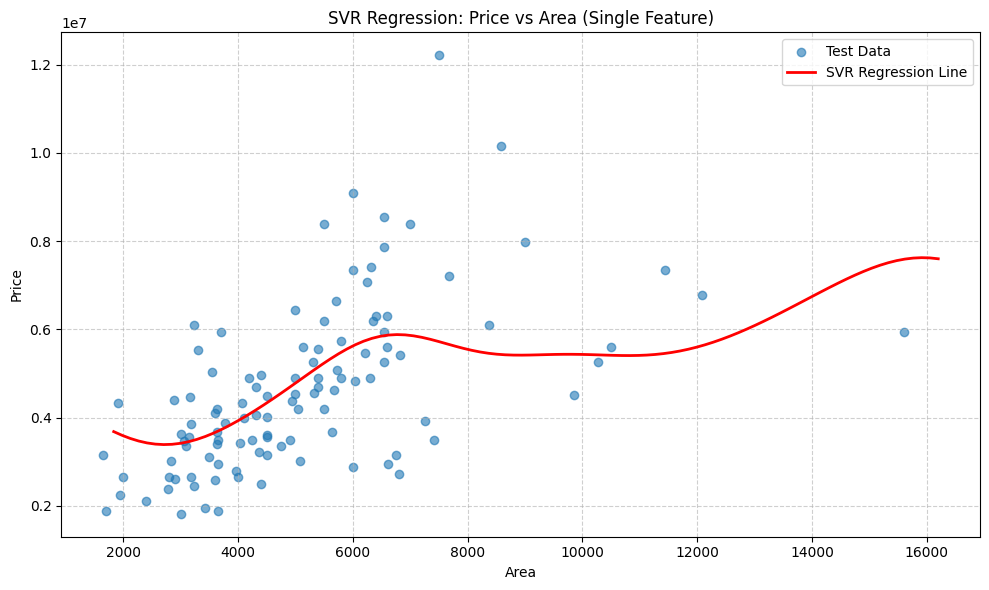


Single Feature (Area) SVR - MSE = 2280925733179.73


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------
# 1. Load and Prepare Dataset
# ------------------------------------------------------
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Select relevant input variables
features = [
    "area", "bedrooms", "bathrooms", "stories", "mainroad",
    "guestroom", "basement", "hotwaterheating",
    "airconditioning", "parking", "prefarea"
]
target = "price"

X = data[features].copy()
y = data[target].copy()

# Convert categorical variables (yes/no) to 0/1
for col in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    X[col] = X[col].map({"yes": 1, "no": 0})

# Fill missing values (if any)
X = X.fillna(X.median())

# ------------------------------------------------------
# 2. Split (80% Training, 20% Test)
# ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# ------------------------------------------------------
# 3. Feature Scaling
# ------------------------------------------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# ------------------------------------------------------
# 4. Train SVR Models with Different Kernels
# ------------------------------------------------------
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train_scaled)

    y_pred_scaled = svr.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test, y_pred)
    results.append({"Kernel": kernel, "MSE": mse})

    print(f"SVR ({kernel} kernel) - MSE = {mse:.2f}")

# ------------------------------------------------------
# 5. Compare with Linear Regression + Regularization (Ridge)
# ------------------------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)

y_pred_ridge_scaled = ridge.predict(X_test_scaled)
y_pred_ridge = scaler_y.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1)).ravel()

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
results.append({"Kernel": "Linear Regression (Ridge)", "MSE": mse_ridge})

print(f"Linear Regression (Ridge) - MSE = {mse_ridge:.2f}")

# ------------------------------------------------------
# 6. Plotting Results - MSE Comparison
# ------------------------------------------------------
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
models = results_df["Kernel"]
mse_values = results_df["MSE"]

bars = plt.bar(models, mse_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title("MSE Comparison: SVR Kernels vs Ridge Regression")
plt.xlabel("Model / Kernel Type")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add value labels on bars
for bar, value in zip(bars, mse_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(mse_values)*0.01,
             f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 7. Regression Line for Single Feature (Area)
# ------------------------------------------------------
# Use only 'area' feature for single feature regression
X_single = data[['area']].copy()
y_single = data[target].copy()

# Split the single feature data
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_single, test_size=0.2, random_state=100
)

# Scale the single feature data
scaler_X_single = StandardScaler()
scaler_y_single = StandardScaler()

X_train_single_scaled = scaler_X_single.fit_transform(X_train_single)
X_test_single_scaled = scaler_X_single.transform(X_test_single)

y_train_single_scaled = scaler_y_single.fit_transform(y_train_single.values.reshape(-1, 1)).ravel()
y_test_single_scaled = scaler_y_single.transform(y_test_single.values.reshape(-1, 1)).ravel()

# Train SVR with RBF kernel on single feature
svr_single = SVR(kernel='rbf')
svr_single.fit(X_train_single_scaled, y_train_single_scaled)

# Create points for regression line
x_range = np.linspace(X_train_single_scaled.min(), X_train_single_scaled.max(), 100).reshape(-1, 1)
y_range_pred_scaled = svr_single.predict(x_range)
y_range_pred = scaler_y_single.inverse_transform(y_range_pred_scaled.reshape(-1, 1)).ravel()
x_range_original = scaler_X_single.inverse_transform(x_range).ravel()

# Plot single feature regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_single, y_test_single, alpha=0.6, label='Test Data')
plt.plot(x_range_original, y_range_pred, 'r-', linewidth=2, label='SVR Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('SVR Regression: Price vs Area (Single Feature)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate MSE for single feature model
y_pred_single_scaled = svr_single.predict(X_test_single_scaled)
y_pred_single = scaler_y_single.inverse_transform(y_pred_single_scaled.reshape(-1, 1)).ravel()
mse_single = mean_squared_error(y_test_single, y_pred_single)

print(f"\nSingle Feature (Area) SVR - MSE = {mse_single:.2f}")